In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Data preparation

In [31]:
# === Step 1: Load Data ===
features_df = pd.read_csv("audio_features.csv")
labels_df = pd.read_csv("dataset_labels.csv")

merged_df = pd.merge(features_df, labels_df, on="file")

In [3]:
# === Step 2: Prepare Input (X) and Output (y) ===
X = merged_df.drop(columns=["file", "EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"])
y = merged_df[["EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"]]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Regression - mean squared error: 0.5354

In [10]:
# === Step 3: Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# === Step 4: Train Model ===
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# === Step 5: Predict & Evaluate ===
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.5354


In [13]:
# === Step 6: Compare Predictions ===
pred_df = pd.DataFrame(y_pred, columns=["EQ_80_pred", "EQ_240_pred", "EQ_2500_pred", "EQ_4000_pred", "EQ_10000_pred"])
pred_df[["EQ_80_true", "EQ_240_true", "EQ_2500_true", "EQ_4000_true", "EQ_10000_true"]] = y_test.reset_index(drop=True)
print(pred_df.head())

   EQ_80_pred  EQ_240_pred  EQ_2500_pred  EQ_4000_pred  EQ_10000_pred  \
0   -4.074665    -3.982770     -8.024394     -7.533144     -11.127872   
1   -4.017122     4.051152      3.925245      4.318184      -4.320496   
2   -0.147962    -4.003884     -7.908212      7.547000      -0.631200   
3    8.017966     7.981692     -5.331401     -8.917207       8.121266   
4   -0.170709     4.001632     -3.845551      3.498463      -7.717437   

   EQ_80_true  EQ_240_true  EQ_2500_true  EQ_4000_true  EQ_10000_true  
0          -4           -4            -8            -8            -12  
1          -4            4             4             4             -4  
2           0           -4            -8             8              0  
3           8            8            -4           -12              8  
4           0            4            -4             4             -8  


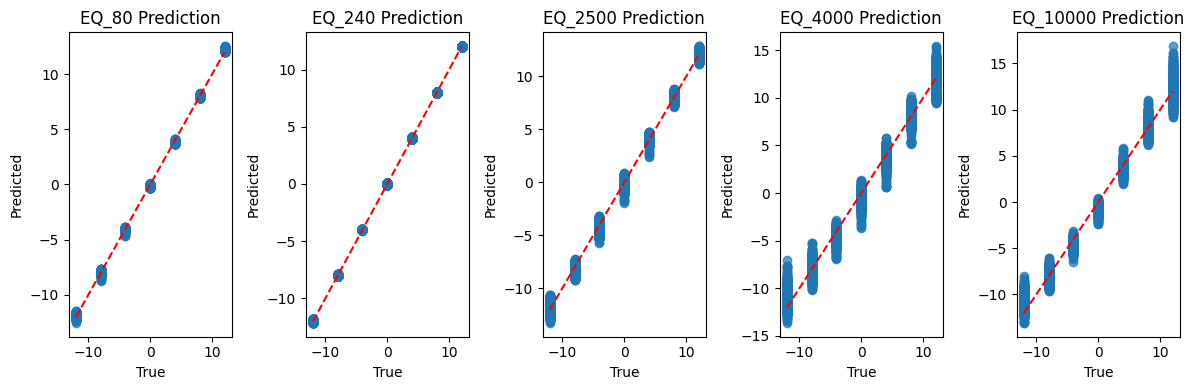

In [14]:
# === Step 7: Plot ===
plt.figure(figsize=(12, 4))
for i, label in enumerate(["EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"]):
    plt.subplot(1, 5, i+1)
    plt.scatter(pred_df[f"{label}_true"], pred_df[f"{label}_pred"], alpha=0.7)
    plt.plot([-12, 12], [-12, 12], color='r', linestyle='--')
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title(f"{label} Prediction")
plt.tight_layout()
plt.show()


### Single-band dataset input test

In [15]:
# === Step 1: Load Interpolation Set ===
features_interp = pd.read_csv("../1-baseline-single-band/audio_features.csv")
labels_interp = pd.read_csv("../1-baseline-single-band/dataset_labels.csv")

merged_interp = pd.merge(features_interp, labels_interp, on="file")

X_interp = merged_interp.drop(columns=["file", "EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"])
y_interp = merged_interp[["EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"]]

# === Step 2: Scale (用剛剛 train set 的 scaler) ===
X_interp_scaled = scaler.transform(X_interp)


In [17]:
# === Step 3: Predict ===
y_interp_pred = model.predict(X_interp_scaled)
mse_interp = mean_squared_error(y_interp, y_interp_pred)
print(f"Interpolation Set Mean Squared Error: {mse_interp:.4f}")

# === Step 4: Compare Predictions ===
pred_interp_df = pd.DataFrame(y_interp_pred, columns=["EQ_80_pred", "EQ_240_pred", "EQ_2500_pred", "EQ_4000_pred", "EQ_10000_pred"])
pred_interp_df[["EQ_80_true", "EQ_240_true", "EQ_2500_true", "EQ_4000_true", "EQ_10000_true"]] = y_interp.reset_index(drop=True)
print(pred_interp_df.head())



Interpolation Set Mean Squared Error: 0.3534
   EQ_80_pred  EQ_240_pred  EQ_2500_pred  EQ_4000_pred  EQ_10000_pred  \
0   -0.227055     0.002422      0.421989     -0.877901      -0.783263   
1   -0.230864     0.986167      0.407027     -0.803572      -0.772848   
2   -0.335381    10.004999      0.153008     -0.441595      -0.835388   
3   -0.347540    11.015138      0.161077     -0.481420      -0.817680   
4   -0.340251    12.015653      0.175054     -0.502808      -0.750108   

   EQ_80_true  EQ_240_true  EQ_2500_true  EQ_4000_true  EQ_10000_true  
0         0.0          0.0           0.0           0.0            0.0  
1         0.0          1.0           0.0           0.0            0.0  
2         0.0         10.0           0.0           0.0            0.0  
3         0.0         11.0           0.0           0.0            0.0  
4         0.0         12.0           0.0           0.0            0.0  


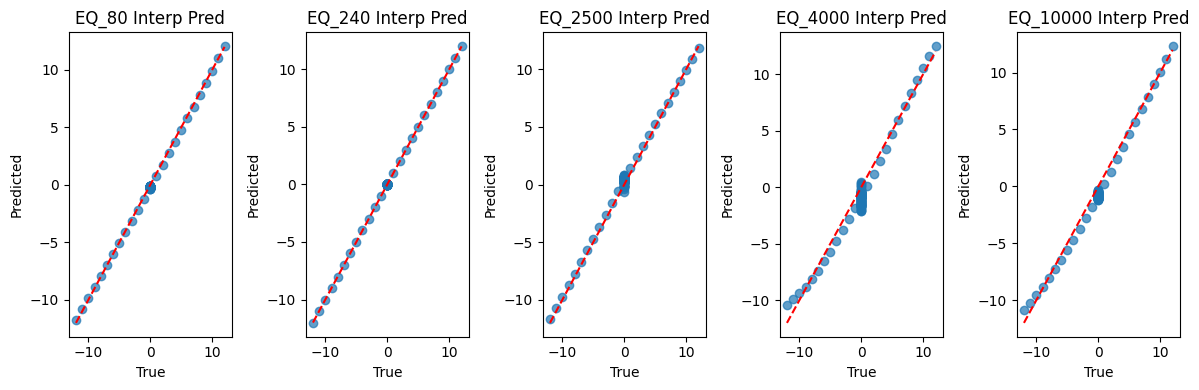

In [18]:
# === Step 5: Plot ===
plt.figure(figsize=(12, 4))
for i, label in enumerate(["EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"]):
    plt.subplot(1, 5, i+1)
    plt.scatter(pred_interp_df[f"{label}_true"], pred_interp_df[f"{label}_pred"], alpha=0.7)
    plt.plot([-12, 12], [-12, 12], color='r', linestyle='--')
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title(f"{label} Interp Pred")
plt.tight_layout()
plt.show()

# Random forest regressor - mean squared error: 1.2740

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
# === Step 3: Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
# === Step 4: Train Random Forest Model ===
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
# === Step 5: Predict & Evaluate ===
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest - Mean Squared Error: {mse:.4f}")


Random Forest - Mean Squared Error: 1.2740


In [27]:
# === Step 6: Compare Predictions ===
pred_df = pd.DataFrame(y_pred, columns=["EQ_80_pred", "EQ_240_pred", "EQ_2500_pred", "EQ_4000_pred", "EQ_10000_pred"])
pred_df[["EQ_80_true", "EQ_240_true", "EQ_2500_true", "EQ_4000_true", "EQ_10000_true"]] = y_test.reset_index(drop=True)
print(pred_df.head())

   EQ_80_pred  EQ_240_pred  EQ_2500_pred  EQ_4000_pred  EQ_10000_pred  \
0       -3.68        -4.28         -7.72         -7.72         -10.64   
1       -3.84         4.56          4.04          3.76          -2.36   
2       -0.56        -3.44         -7.64          8.44           1.20   
3        8.16         8.28         -4.16         -9.92           9.12   
4       -1.16         4.96         -4.20          4.20          -8.56   

   EQ_80_true  EQ_240_true  EQ_2500_true  EQ_4000_true  EQ_10000_true  
0          -4           -4            -8            -8            -12  
1          -4            4             4             4             -4  
2           0           -4            -8             8              0  
3           8            8            -4           -12              8  
4           0            4            -4             4             -8  


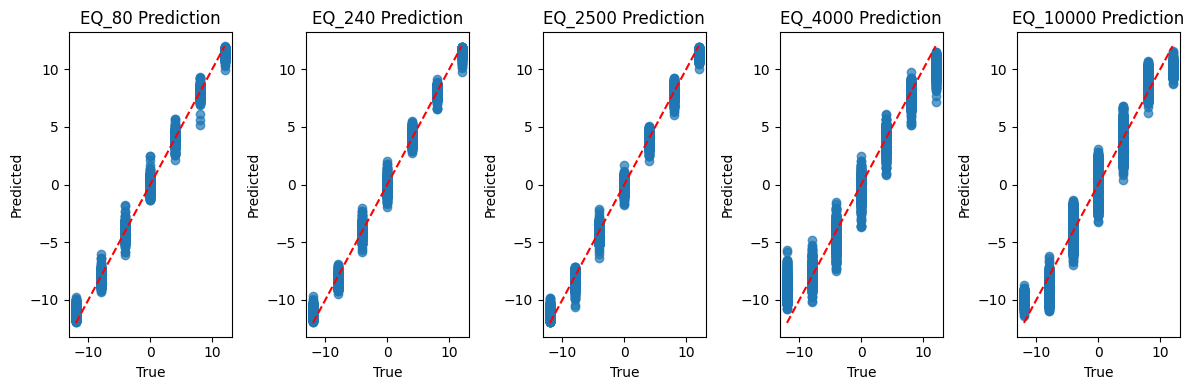

In [28]:
# === Step 7: Plot ===
plt.figure(figsize=(12, 4))
for i, label in enumerate(["EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"]):
    plt.subplot(1, 5, i+1)
    plt.scatter(pred_df[f"{label}_true"], pred_df[f"{label}_pred"], alpha=0.7)
    plt.plot([-12, 12], [-12, 12], color='r', linestyle='--')
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title(f"{label} Prediction")
plt.tight_layout()
plt.show()


# fully-NN - mean squared error: 0.0216

In [37]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np

In [ ]:
# === Step 2: Prepare Input (X) and Output (y) ===
X = merged_df.drop(columns=["file", "EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"]).values
y = merged_df[["EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"]].values

# Standardize features 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Step 3: PyTorch Dataset & DataLoader ===
class EQQDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = EQQDataset(X_train_scaled, y_train)
test_ds  = EQQDataset(X_test_scaled,  y_test)
train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
test_dl  = DataLoader(test_ds, batch_size=256, shuffle=False)

In [34]:
# === Step 4: Define Model ===
class SimpleMLP(nn.Module):
    def __init__(self, in_dim, hidden=64, out_dim=5):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, hidden),
            nn.ReLU(),
            nn.Linear(hidden, hidden),
            nn.ReLU(),
            nn.Linear(hidden, out_dim)
        )
    def forward(self, x):
        return self.net(x)

model = SimpleMLP(X_train_scaled.shape[1])

In [35]:
# === Step 5: Train ===
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()
epochs = 60

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for xb, yb in train_dl:
        pred = model(xb)
        loss = loss_fn(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * len(xb)
    print(f"Epoch {epoch+1}/{epochs} - Train MSE: {running_loss/len(train_ds):.4f}")

Epoch 1/60 - Train MSE: 27.6531
Epoch 2/60 - Train MSE: 1.9968
Epoch 3/60 - Train MSE: 0.7384
Epoch 4/60 - Train MSE: 0.5211
Epoch 5/60 - Train MSE: 0.3982
Epoch 6/60 - Train MSE: 0.3089
Epoch 7/60 - Train MSE: 0.2559
Epoch 8/60 - Train MSE: 0.2191
Epoch 9/60 - Train MSE: 0.1892
Epoch 10/60 - Train MSE: 0.1691
Epoch 11/60 - Train MSE: 0.1482
Epoch 12/60 - Train MSE: 0.1329
Epoch 13/60 - Train MSE: 0.1208
Epoch 14/60 - Train MSE: 0.1110
Epoch 15/60 - Train MSE: 0.1010
Epoch 16/60 - Train MSE: 0.0933
Epoch 17/60 - Train MSE: 0.0850
Epoch 18/60 - Train MSE: 0.0793
Epoch 19/60 - Train MSE: 0.0745
Epoch 20/60 - Train MSE: 0.0691
Epoch 21/60 - Train MSE: 0.0631
Epoch 22/60 - Train MSE: 0.0606
Epoch 23/60 - Train MSE: 0.0588
Epoch 24/60 - Train MSE: 0.0537
Epoch 25/60 - Train MSE: 0.0511
Epoch 26/60 - Train MSE: 0.0489
Epoch 27/60 - Train MSE: 0.0470
Epoch 28/60 - Train MSE: 0.0459
Epoch 29/60 - Train MSE: 0.0434
Epoch 30/60 - Train MSE: 0.0411
Epoch 31/60 - Train MSE: 0.0410
Epoch 32/60 - Tr

In [38]:
# === Step 6: Evaluation ===
model.eval()
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
    y_pred_tensor = model(X_test_tensor)
    y_pred = y_pred_tensor.numpy()

# MSE
mse = np.mean((y_pred - y_test)**2)
print(f"Test Mean Squared Error: {mse:.4f}")

Test Mean Squared Error: 0.0216


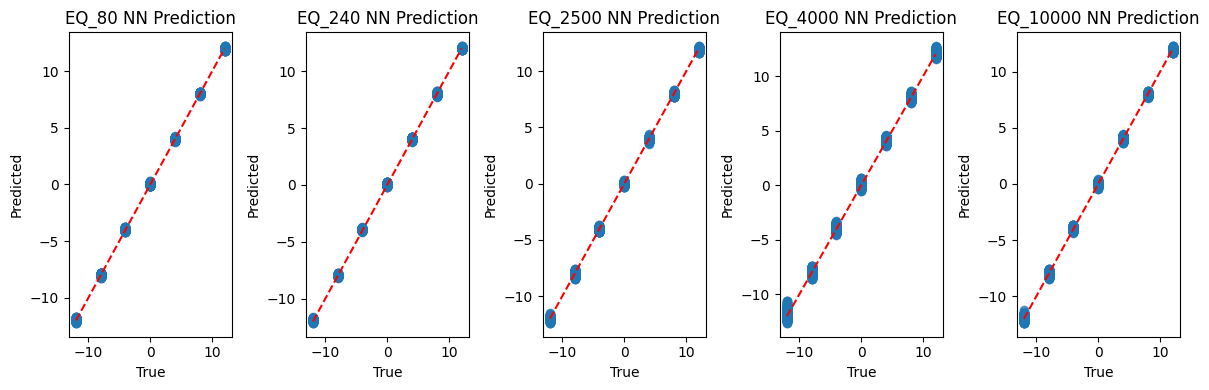

In [39]:
# === Step 7: Plot ===
plt.figure(figsize=(12, 4))
label_list = ["EQ_80", "EQ_240", "EQ_2500", "EQ_4000", "EQ_10000"]
for i, label in enumerate(label_list):
    plt.subplot(1, 5, i+1)
    plt.scatter(y_test[:, i], y_pred[:, i], alpha=0.7)
    plt.plot([-12, 12], [-12, 12], color='r', linestyle='--')
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.title(f"{label} NN Prediction")
plt.tight_layout()
plt.show()